## Parte 1 Taller Modelación y Simulación 4

### Integrantes:
+ Santiago Beltrán
+ Laura González 
+ Tomás Macías

### Entendimiento del negocio (CRISP-DM)
Incluye: Explicación de la problemática, preguntas de negocio que se quieren responder, posibles riesgos, las limitaciones existentes y los criterios de éxito.  

Usamos como guía "https://pdf4pro.com/amp/download?data_id=73581e&slug=crisp-dm-1-the-modeling-agency-com".

Repositorio del dataset: "https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175"


En el entendimiento del negocio, según nuestra guía, se realizan las siguientes tareas: 
- Determinar los objetivos del negocio
- Evaluar el panorama
- Determinar las metas de la minería de datos
- Producir un plan del proyecto



#### Evaluar el panorama
El conjunto de datos que se nos proporciona lleva por nombre “Conjunto de datos del Estudio 175 del Grupo de Ensayos Clínicos sobre el SIDA”. Esta recopilación fue financiada por el Instituto Nacional de Alergias y Enfermedades Infecciosas, así como por las Unidades del Centro General de Investigación, respaldadas por el Centro Nacional de Recursos para la Investigación, ambos organismos de los Estados Unidos.

Los datos representan historiales clínicos de pacientes mayores de 12 años, estadounidenses con SIDA. Los pacientes fueron seleccionados de manera aleatoria, exceptuando aquellos que poseían algunas de las condiciones siguientes: alergias al ddc, ddl o AZT; neuropatía periférica de grado 2 o mayor; pancreatitis aguda o crónica; terapia aguda para una infección o enfermedad en los últios 14 días; reciente abuso de alcohol. Para este estudio, se asignó a cada paciente un tratamiento al azar de AZT, AZT y ddl, AZT y ddc, o ddl; esto se realizó durante al menos dos años

El SIDA es causado por el VIH (Virus de la Inmunodeficiencia Humana), este no tiene cura. El VIH fue identificado en 1983 (https://www.nobelprize.org/prizes/medicine/2008/barre-sinoussi/facts/), mientras que el dataset fue publicado, por primera vez, 13 años después (1996).

#### Determinar los objetivos del negocio
Conociéndo la fuente de los datos, así como los organismos que financiaron este estudio, los objetivos del negocio serán los siguientes:
- Describir la población afectada.
- Determinar la eficacia y seguridad de distintos tratamientos, para encontrar el que mejor prevenga la progresión del VIH
- Predecir qué pacientes morirán en cierto intervalo de tiempo.


#### Éxito del negocio
El éxito de este negocio es determinado por el cumplimiento de sus objetivos.

#### Riesgos del negocio
Existen algunos riesgos para llevar a cabo este negocio, estos son: mal uso de tratamiento de datos personales del paciente e información sensible (como la raza, orientación sexual, etc); que el tratamiento pueda causar algún efecto secundario a un paciente, de manera que afecte significativamente y de manera negativa al paciente; que el paciente decida retirarse del tratamiento por motivos personales, antes del tiempo determinado.


#### Determinar las metas de la minería de datos
El propósito del dataset, según su repositorio, fue recopilar información útil para determinar los rendimientos de tipos de tratamiento del VIH. Además, servir para entrenar modelos predictivos que puedan determinar si un paciente morirá cierto tiempo después 

Para esto se recolectaron 23 características, excluímos algunas de estas según las instrucciones del taller.



#### Producir un plan del proyecto
El plan inicial es el siguiente:
1. Crear un repositorio en Github para sincronizar labores del equipo.
2. Crear un diccionario de datos para entender con qué se trabaja.
3. Una vez cargados los datos, realizar un análisis exploratorio con el objetivo de clasificar su calidad.
4. Verificar si los datos son adecuados para los objetivos del negocio. En caso contrario, replantear estos últimos.
5. Caracterizar la población incluída en el dataset, hacer esto visualmente. **(Primer objetivo)**
6. Consultar los tratamientos presentes en el conjunto de datos a fin de entender qué significa esta variable.
7. Describir numérica y visualmente la efectividad de los distintos tratamientos usados en la población estudiada. **(Segundo objetivo)**
9. Desarrollar un modelo predictivo que permita determinar, en cierto intervalo de tiempo, qué pacientes morirán. **(Tercer objetivo)**
   - Explorar distintos modelos predictivos y, según las capacidades técnicas y recursos disponibles, seleccionar el más adecuado para el proyecto.
 

*Este plan debe considerarse un borrador inicial. Será ajustado conforme se evalúe la efectividad de la metodología aplicada.*

### Carga de datos 
Excluímos, según las instrucciones, las variables: oprior, z30, zprior, preanti, str2, strat, offtrt, cd40, cd420, cd80, cd820.

In [2]:
import pandas as pd
urlcsv = "http://archive.ics.uci.edu/static/public/890/data.csv"
dfs = pd.read_csv(urlcsv)
no_data = ["oprior", "z30", "zprior", "preanti", "str2", "strat", "offtrt", "cd40", "cd420", "cd80", "cd820"]
df = dfs.drop(no_data, axis=1)
df

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
0,10056,0,948,2,48,89.8128,0,0,0,100,0,0,0,1
1,10059,1,1002,3,61,49.4424,0,0,0,90,0,0,0,1
2,10089,0,961,3,45,88.4520,0,1,1,90,0,1,0,1
3,10093,0,1166,3,47,85.2768,0,1,0,100,0,1,0,1
4,10124,0,1090,0,43,66.6792,0,1,0,100,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,990021,0,1091,3,21,53.2980,1,0,0,100,0,1,0,1
2135,990026,0,395,0,17,102.9672,1,0,0,100,1,1,0,0
2136,990030,0,1104,2,53,69.8544,1,1,0,90,1,1,0,1
2137,990071,1,465,0,14,60.0000,1,0,0,100,0,1,0,0


### Diccionario de datos
Descripción de la tabla, volumetría, descripción y tipo de cada columna, etc

"DiccionarioDeDatos.xlsx"

### Un primer análisis
#### Vistazo a los datos (head)

In [8]:
df.head()

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
0,10056,0,948,2,48,89.8128,0,0,0,100,0,0,0,1
1,10059,1,1002,3,61,49.4424,0,0,0,90,0,0,0,1
2,10089,0,961,3,45,88.4520,0,1,1,90,0,1,0,1
3,10093,0,1166,3,47,85.2768,0,1,0,100,0,1,0,1
4,10124,0,1090,0,43,66.6792,0,1,0,100,0,1,0,0


#### Estadísticos descriptivos (describe)

In [6]:
df.describe().round(2)

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
count,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00
mean,248778.25,0.24,879.10,1.52,35.25,75.13,0.08,0.66,0.13,95.45,0.29,0.83,0.17,0.75
std,234237.29,0.43,292.27,1.13,8.71,13.26,0.28,0.47,0.34,5.90,0.45,0.38,0.38,0.43
min,10056.00,0.00,14.00,0.00,12.00,31.00,0.00,0.00,0.00,70.00,0.00,0.00,0.00,0.00
25%,81446.50,0.00,727.00,1.00,29.00,66.68,0.00,0.00,0.00,90.00,0.00,1.00,0.00,1.00
50%,190566.00,0.00,997.00,2.00,34.00,74.39,0.00,1.00,0.00,100.00,0.00,1.00,0.00,1.00
75%,280277.00,0.00,1091.00,3.00,40.00,82.56,0.00,1.00,0.00,100.00,1.00,1.00,0.00,1.00
max,990077.00,1.00,1231.00,3.00,70.00,159.94,1.00,1.00,1.00,100.00,1.00,1.00,1.00,1.00


#### Análisis de lo visto hasta el momento



**Hay 2139 registros**, a continuación un análisis variable a variable excluyendo el id del paciente.

- Time (Tiempo hasta fallecimiento o pérdida de registro del paciente): Se supone sobre esta variable que es tiempo en días, pues no se encontró información al respecto. En promedio pasan $879$ días hasta que el paciente fallece o se pierde registro del mismo, hay una desviación estandar significativa que representa aproximadamente un tercio del promedio. Notablemente, el primer cuartil (25%) se haya $997 - 727 = 270$ unidades a la izquierda de la media (50%), esta último se haya a $1091 - 997 = 94$ unidades a la izquierda del tercer cuartil (75%), esto sugiere una distribución con asimetría negativa. A esta misma conclusión llegamos comparando mediana y media.

- Trt (Tipo de tratamiento): Al ser un categórico no resultan muy útiles los estadísticos descriptivos del promedio, desviación estándar, entre otros. Podemos asegurar que se usaron todos los tratamientos pues todos aparecen. También, que se usaron en similar proporción, esta conclusión se extrae de los percentiles pero también del promedio pues $0 \cdot{0.25} + 1 \cdot{0.25} + 2 \cdot{0.25} + 3 \cdot{0.25} = 1.5 \approx 1.52$.

- Age (edad): El promedio de la edad de la población estudiada es de 35.25 años. Sin embargo, los pacientes van desde los 12 hasta los 70 años. La mediana es de 34 años, lo cual, junto al promedio, puede indicar una distribución con asimetría positiva lo que denota en este caso que la población tiende a ser menor al promedio.

- Wtkg (peso en kg): En promedio, los pacientes pesan 75.13 kg. El rango de pesos es, al igual que de edades, bastante amplio. Concretamente el rango de pesos es de $159.94 - 31 = 128.94$ kg. La diferencia entre la media y la mediana es de $75.13 - 74.39 = 0.74 \approx 0$. Esto sugiere una distribución centradada.

- Hemo (condición hemofilia): A partir de los estadísticos descriptivos vemos que esta condición es algo rara, pues al menos el 75% no la tienen. Vemos que está en el dataset pues en la tabla el máximo es 1.

- Homo (ser homosexual [binario]): El promedio de 2139 filas de esta variable binaria (con valores 0 y 1) es de $0.66$. A partir de esto podemos saber que el 66% de los pacientes con SIDA son homosexuales, esto contrasta con la proporción entre personas sanas (en nuestra experiencia), por tanto es posible que la población homosexual esté más expuesta al SIDA.

- Drugs (antecedentes con drogas intravenosas): Haciendo similar análisis a la variable Homo, se estima que un 13% de la población tiene un historial de uso de drogas. 

- Karnof (escala Karnofsky): Los estadísticos descriptivos muestran que, en general, los pacientes tienen síntomas leves (promedio 95.45 con desviación estandar de sólo 5). El mínimo en la escala registrado es de 70 lo cuál es, según esta, equivalente a ser capaz de cuidarse por si mismo pero no de hacer alguna activdad o trabajo normal.

- Race (blanco o no blanco): Igual análisis a las demás variables binarias, el 29% de los pacientes son blancos. Esto contrasta con la distribución racial en EEUU, nos preguntamos si existe algún sesgo en la toma de datos, tal vez algún hospital en una zona con esta proporción de habitantes accedió a dar sus registros o puede ser que las personas no blancas estén más expuestas a desarrollar SIDA o a contagiarse de VIH.

- Gender (género hombre / mujer): EL promedio es de 0.83, como 1 representa "Hombre" para esta variable binaria, el 83% de los pacientes son hombres. Esto, junto con la prevalencia de personas homosexuales en la muestra, parece indicar ya sea un sesgo a elegir hombres homosexuales, o una predisposición de estos a contagiarse.

- Symptom (síntomas clínicos al inicio): El promedio es de 0.17, 1 representa "Sintomático" para la variable binaria. Entonces, el 17% de los pacientes presentaba síntomas clínicos al inicio. Que tantos pacientes sean asintomáticos resulta interesante pues significa que sospechaban haber sido contagiados. 

- Treat (binario si se usa ZDV o no): El promedio es de 0.75, es decir, el 75% de los pacientes son tratados utilizando alguna combinación que contiene ZDV. 

- Cid (indicador de censura binario): El promedio es de 0.24, es decir, el 25% de los pacientes del estudio fallecieron. 

### Análisis de calidad de los datos

#### ¿ Qué dimensiones de calidad de datos se van a analizar?

1. Completitud:
La dimensión de completitud consiste en el porcentaje de datos llenos en comparación a el total de datos.
 
2. Conformidad / Validez:
Significa que los datos deben ser representados con un formato constante, adheriendose a un tipo de dato específico.
 
3. Consistencia:
Los datos son congruentes entre sí, todas las relaciones existentes entre las variables son ciertas y pueden representar situaciones del mundo real, se identifican relaciones anómalas.

4. Precisión/ Exactitud:
El dato por si solo es coherente, lógico y verdadero. Se usa para saber la diferencia entre los datos almacenados con los reales.

5. Duplicidad / Unicidad:
Se refiere a la ocurrencia única de un objeto al ser grabado en el dataset.

6. Integridad:
Es el grado en el que las varias fuentes de datos están sincronizadas, y que los cambios que hay en una fuente se refleje en otra.

#### - Completitud:

In [15]:
#Para revisar datos incompletos, sumar nulos.
df.isna().sum()

pidnum     0
cid        0
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
race       0
gender     0
symptom    0
treat      0
dtype: int64

Se ve que todas las columnas tienen 0 datos nulos.

#### - Conformidad/Validez:

Para analizar la validez revisaremos que todas las variables realmente son del tipo que dicen ser.

**Sólo hay hombres y mujeres**


In [4]:
df[(df["time"]<=0 )| (df["wtkg"]<= 0)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat


**No hay tiempo ni peso negativo**

In [42]:
# Según el repositorio, hay 4 tratamientos posibles [0, 1, 2, 3] esto se confirma aquí.
df["trt"].value_counts().sort_index()

trt
0    532
1    522
2    524
3    561
Name: count, dtype: int64

**Verificación de variables binarias**

In [44]:
df["homo"].value_counts()

homo
1    1414
0     725
Name: count, dtype: int64

In [3]:
df["gender"].value_counts()

gender
1    1771
0     368
Name: count, dtype: int64

In [45]:
df["cid"].value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

In [8]:
df["hemo"].value_counts()

hemo
0    1959
1     180
Name: count, dtype: int64

In [9]:
df["race"].value_counts()

race
0    1522
1     617
Name: count, dtype: int64

In [10]:
df["symptom"].value_counts()

symptom
0    1769
1     370
Name: count, dtype: int64

In [11]:
df["treat"].value_counts()

treat
1    1607
0     532
Name: count, dtype: int64

In [47]:
df["drugs"].value_counts()

drugs
0    1858
1     281
Name: count, dtype: int64

In [34]:
# Los valores de la Escala Karnofsky se definen en el intervalo [0, 100].
# No hay ningún dato fuera de este rango, es consistente.
df[(df["karnof"] < 0) | (df["karnof"] > 100)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat


In [59]:
# Se confirma el rango de edades visualmente

df[(df["age"] < 20) | (df['age'] > 60)]['age'].value_counts().sort_index()

age
12    3
13    3
14    6
15    3
16    7
17    4
18    7
19    7
61    2
62    5
63    6
64    2
65    3
66    1
67    2
68    2
69    1
70    2
Name: count, dtype: int64

El resto de las variables enteras y binarias cuentan con valores que no se salen de lo que son.

#### - Consistencia:


In [41]:
df[["wtkg", "age", "karnof"]].describe().T[["mean","std","min","max"]]

,mean,std,min,max
wtkg,75.125311,13.263164,31.0,159.93936
age,35.248247,8.709026,12.0,70.00000
karnof,95.446470,5.900985,70.0,100.00000


Note que el peso tiene una variación enorme, hay individuos de 31 kilos y otros de 160. Esto puede representar anomalías. A continuación valores que pueden estimar valores extremos de obesidad y desnutrición

In [63]:
print(df[df["wtkg"] > 120].shape[0])
print(df[ (df["wtkg"] < 40) & (df["age"]>15)].shape[0])

12
1


In [38]:
df[(df["wtkg"] < 40)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
1931,610043,0,225,2,30,36.78696,0,1,0,90,0,1,0,1
2014,910034,0,1121,2,13,32.65920,1,0,0,100,0,1,1,1
2072,950056,1,324,1,12,31.00000,1,0,0,100,0,1,0,1


             age    karnof
age     1.000000 -0.084544
karnof -0.084544  1.000000


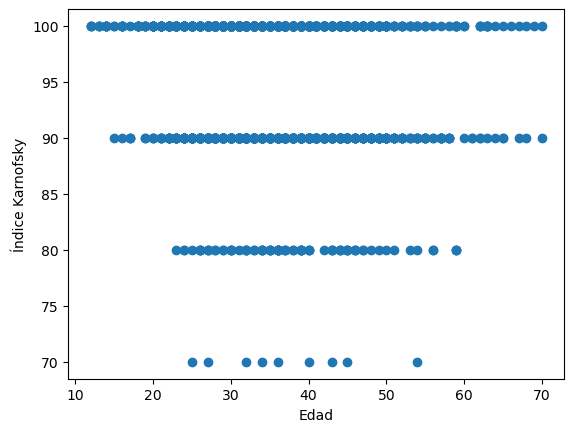

In [48]:
import matplotlib.pyplot as plt
print(df[['age', 'karnof']].corr(method='spearman'))
plt.scatter(df['age'], df['karnof'])
plt.xlabel('Edad')
plt.ylabel('Índice Karnofsky')
plt.show()


Hay una correlacion negativa entre edad y karnofsky, el cual es esperado al debilitarse el sistema inmune y reducirse la funcionalidad física de los pacientes.

            wtkg    karnof
wtkg    1.000000  0.040878
karnof  0.040878  1.000000


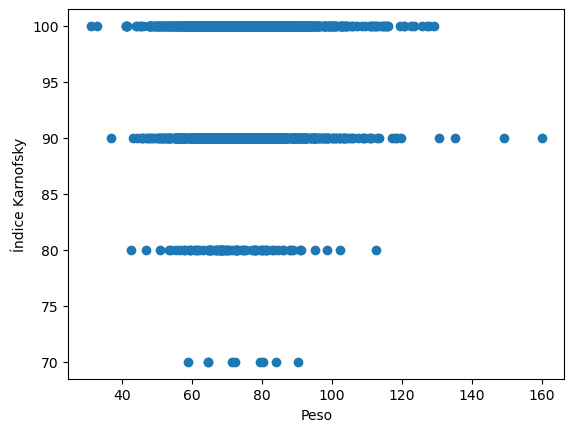

In [47]:
print(df[['wtkg', 'karnof']].corr(method='spearman'))
plt.scatter(df['wtkg'], df['karnof'])
plt.xlabel('Peso')
plt.ylabel('Índice Karnofsky')
plt.show()

La correlación entre peso y karnofsky puede variar, al tener menor puntaje en pesos extremos, pero valores altos en pesos saludables

#### - Precisión/Exactitud:

#### - Duplicidad/Unicidad:

In [5]:
df.duplicated().sum()

np.int64(0)

No existen registros repetidos

In [6]:
# Cada paciente tiene un id único.
df['pidnum'].is_unique

True

#### - Integridad:

#### Resultado

### Conclusiones

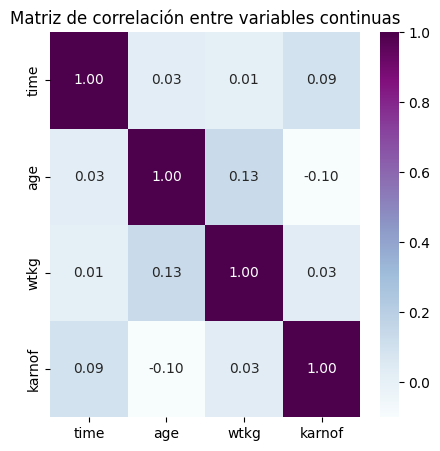

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_numericas = ["time", "age", "wtkg", "karnof"]
corr = df[vars_numericas].corr(method="pearson")

plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="BuPu")
plt.title("Matriz de correlación entre variables continuas")
plt.show()


KeyError: 'outlier_mahalanobis'

<Figure size 600x500 with 0 Axes>